## *1/ Buisness understanding & Data science objective*



## *2/ Data Understanding*

Display the first few rows of the DataFrame, check data types, and get a summary of basic statistics to understand the dataset's structure and content.


In [2]:
import pandas as pd
df = pd.read_csv('../data/hateXplain.csv')
print("DataFrame loaded successfully.")
df.head()

DataFrame loaded successfully.


,post_id,annotator_id,label,target,post_tokens
0,1179055004553900032_twitter,1,normal,NaN,i dont think im getting my baby them white 9 h...
1,1179055004553900032_twitter,2,normal,NaN,i dont think im getting my baby them white 9 h...
2,1179055004553900032_twitter,3,normal,NaN,i dont think im getting my baby them white 9 h...
3,1179063826874032128_twitter,1,normal,NaN,we cannot continue calling ourselves feminists...
4,1179063826874032128_twitter,2,normal,NaN,we cannot continue calling ourselves feminists...


In [3]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nData types and non-null values:")
df.info()

print("\nDescriptive statistics for all columns:")
print(df.describe(include='all'))

First 5 rows of the DataFrame:
                       post_id  annotator_id   label target  \
0  1179055004553900032_twitter             1  normal    NaN   
1  1179055004553900032_twitter             2  normal    NaN   
2  1179055004553900032_twitter             3  normal    NaN   
3  1179063826874032128_twitter             1  normal    NaN   
4  1179063826874032128_twitter             2  normal    NaN   

                                         post_tokens  
0  i dont think im getting my baby them white 9 h...  
1  i dont think im getting my baby them white 9 h...  
2  i dont think im getting my baby them white 9 h...  
3  we cannot continue calling ourselves feminists...  
4  we cannot continue calling ourselves feminists...  

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60444 entries, 0 to 60443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       60444 non-null  

#### *Select Relevant Columns*

Create a new DataFrame containing only the 'label', 'target', and 'post_tokens' columns, as requested.


In [4]:
df_selected = df[['label', 'target', 'post_tokens']]
print("First 5 rows of the new DataFrame with selected columns:")
print(df_selected.head())

First 5 rows of the new DataFrame with selected columns:
    label target                                        post_tokens
0  normal    NaN  i dont think im getting my baby them white 9 h...
1  normal    NaN  i dont think im getting my baby them white 9 h...
2  normal    NaN  i dont think im getting my baby them white 9 h...
3  normal    NaN  we cannot continue calling ourselves feminists...
4  normal    NaN  we cannot continue calling ourselves feminists...


#### *Explore Relationship between 'target' and 'label'*

Investigate the relationship and potential correlation between the 'target' and 'label' columns. This might involve creating a cross-tabulation or grouping to see how these two columns are distributed together.


In [5]:
df_selected.loc[:, 'target'] = df_selected['target'].fillna('unknown')
print("Missing values in 'target' filled with 'unknown'.")

contingency_table = pd.crosstab(df_selected['label'], df_selected['target'])
print("\nContingency table (raw counts) of 'label' vs 'target':")
print(contingency_table)

contingency_table_normalized = pd.crosstab(df_selected['label'], df_selected['target'], normalize='columns')
print("\nContingency table (normalized by column) of 'label' vs 'target':")
print(contingency_table_normalized)

Missing values in 'target' filled with 'unknown'.

Contingency table (raw counts) of 'label' vs 'target':
target      African  African, Arab  African, Arab, Asian  \
label                                                      
hatespeech     4154             81                     9   
normal          392              7                     1   
offensive      1774             38                     3   

target      African, Arab, Asian, Caucasian, Hispanic  \
label                                                   
hatespeech                                          0   
normal                                              2   
offensive                                           4   

target      African, Arab, Asian, Caucasian, Hispanic, Christian, Islam, Jewish  \
label                                                                             
hatespeech                                                  0                     
normal                                                    

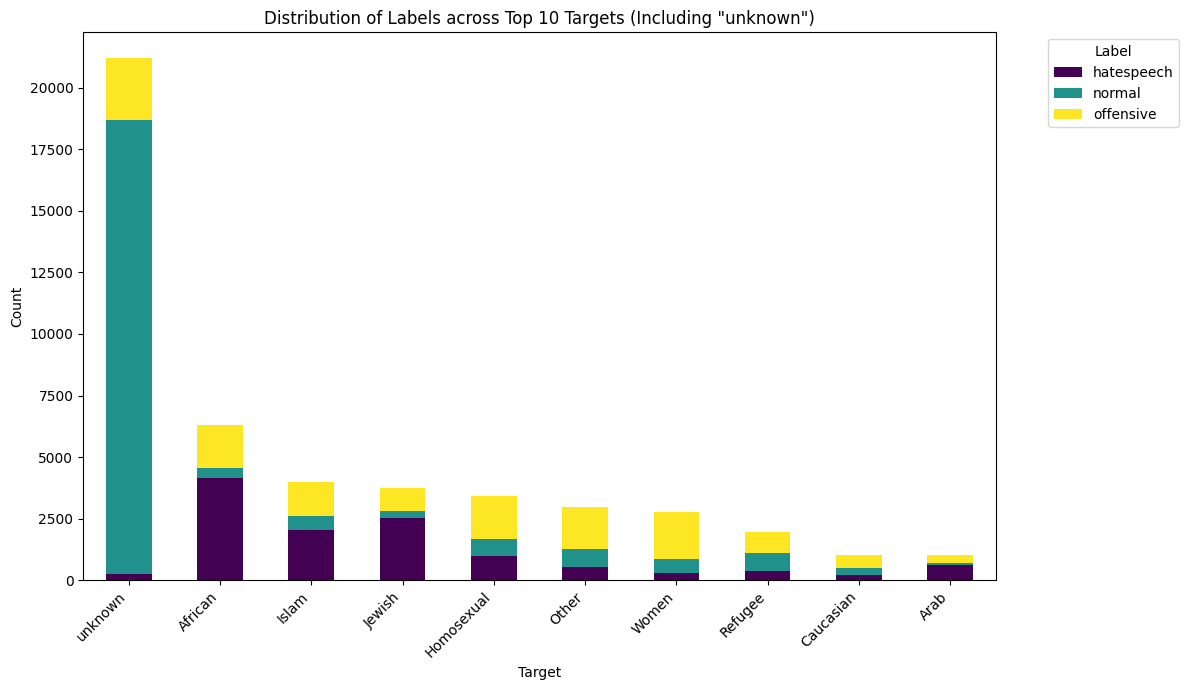

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N most frequent targets, including 'unknown'
N = 10
top_targets_with_unknown = contingency_table.sum().nlargest(N).index

# Filter the contingency table for these top targets
contingency_table_top_targets_with_unknown = contingency_table[top_targets_with_unknown]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))
contingency_table_top_targets_with_unknown.T.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

ax.set_title(f'Distribution of Labels across Top {N} Targets (Including "unknown")')
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


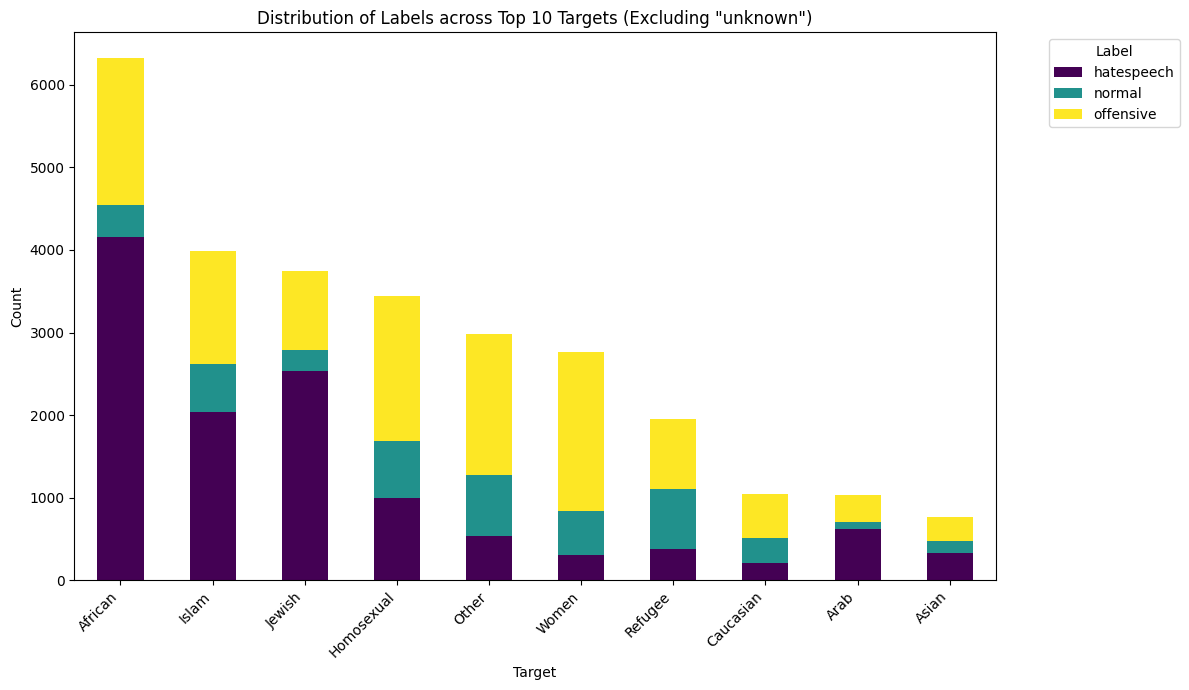


--- Key Insights from 'target' and 'label' Relationship ---
1. The 'unknown' target category is by far the most frequent, with the majority of these instances labeled as 'normal'. This suggests a significant portion of posts either do not target a specific group or their target was not identified during annotation.
2. For specific identified targets, 'hatespeech' often constitutes a large proportion of the labels. For example, for the 'African' target, 'hatespeech' makes up a significant majority (approx. 65.7%), followed by 'offensive' (approx. 28.1%).
3. Some targets show a strong prevalence of 'hatespeech' or 'offensive' labels, indicating that certain groups are disproportionately subjected to these types of content.
4. Conversely, for targets like 'Christian', 'Muslim', or 'Jewish', the proportion of 'normal' labels might be higher, or the distribution might vary significantly, indicating diverse sentiment.
5. There are many unique target combinations (958), indicating the comple

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'unknown' target for better visualization of specific targets if it dominates
contingency_table_filtered = contingency_table.drop(columns=['unknown'], errors='ignore')

# Calculate the sum of labels for each target to find the most frequent ones
target_counts = contingency_table_filtered.sum()

# Get the top N most frequent targets
N = 10
top_targets = target_counts.nlargest(N).index

# Filter the contingency table for the top targets
contingency_table_top_targets = contingency_table_filtered[top_targets]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))
contingency_table_top_targets.T.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

ax.set_title(f'Distribution of Labels across Top {N} Targets (Excluding "unknown")')
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summarize key insights from the contingency tables
print("\n--- Key Insights from 'target' and 'label' Relationship ---")
print("1. The 'unknown' target category is by far the most frequent, with the majority of these instances labeled as 'normal'. This suggests a significant portion of posts either do not target a specific group or their target was not identified during annotation.")
print("2. For specific identified targets, 'hatespeech' often constitutes a large proportion of the labels. For example, for the 'African' target, 'hatespeech' makes up a significant majority (approx. 65.7%), followed by 'offensive' (approx. 28.1%).")
print("3. Some targets show a strong prevalence of 'hatespeech' or 'offensive' labels, indicating that certain groups are disproportionately subjected to these types of content.")
print("4. Conversely, for targets like 'Christian', 'Muslim', or 'Jewish', the proportion of 'normal' labels might be higher, or the distribution might vary significantly, indicating diverse sentiment.")
print("5. There are many unique target combinations (958), indicating the complexity and specificity of hate speech targets. However, many of these combinations are very rare.")
print("6. The normalized table is crucial for understanding the *proportion* of each label for a given target, rather than just raw counts which can be biased by overall target frequency.")


## *2/ Feature engineering*

Adapt the huge amount of normal taget associated with column unknown

*Undersampling for taget normal



*Oversampling for target hatespeech

In [9]:
from sklearn.utils import resample
import pandas as pd

# Filter only target == "unknown"
df_unknown = df_selected[df_selected["target"] == "unknown"].copy()

# Split by label
df_normal = df_unknown[df_unknown["label"] == "normal"]
df_offensive = df_unknown[df_unknown["label"] == "offensive"]
df_hate = df_unknown[df_unknown["label"] == "hatespeech"]

# 1. Undersample normal → 5000
df_normal_bal = resample(
    df_normal,
    replace=False,
    n_samples=5000,
    random_state=42
)

# 2. Keep offensive as-is
df_offensive_bal = df_offensive.copy()

# 3. Light oversampling of hatespeech → 1500
df_hate_bal = resample(
    df_hate,
    replace=True,
    n_samples=1500,
    random_state=42
)

# Combine
df_balanced_unknown = pd.concat([df_normal_bal, df_offensive_bal, df_hate_bal])

# Shuffle
df_balanced_unknown = df_balanced_unknown.sample(frac=1, random_state=42).reset_index(drop=True)


In [10]:
print("\nLabel counts BEFORE balancing:")
print(df_balanced_unknown['label'].value_counts())


Label counts BEFORE balancing:
label
normal        5000
offensive     2499
hatespeech    1500
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_8372\377071286.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_unknown, x='label', palette='viridis')


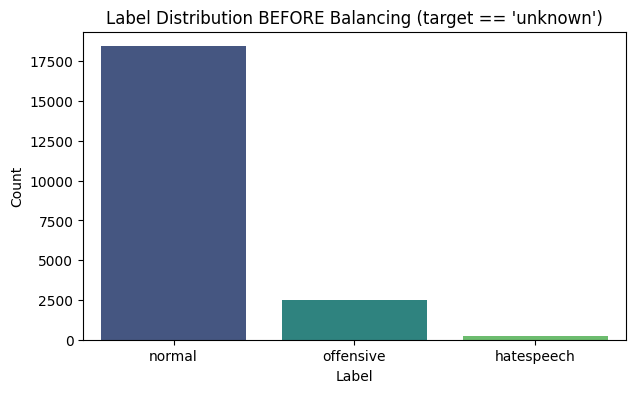

C:\Users\DELL\AppData\Local\Temp\ipykernel_8372\377071286.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced_unknown, x='label', palette='viridis')


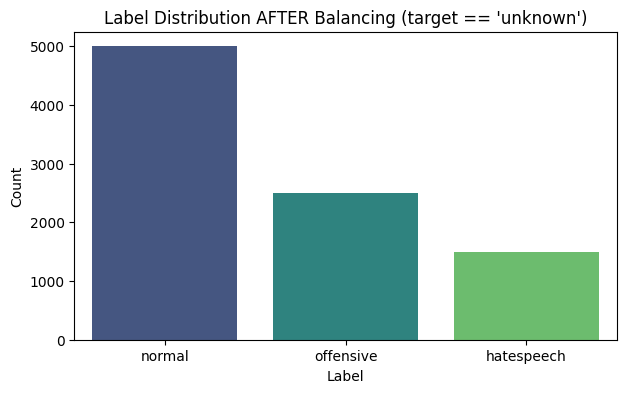

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# PLOT 1 : BEFORE balancing
# -----------------------------
plt.figure(figsize=(7,4))
sns.countplot(data=df_unknown, x='label', palette='viridis')
plt.title("Label Distribution BEFORE Balancing (target == 'unknown')")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# -----------------------------
# PLOT 2 : AFTER balancing
# -----------------------------
plt.figure(figsize=(7,4))
sns.countplot(data=df_balanced_unknown, x='label', palette='viridis')
plt.title("Label Distribution AFTER Balancing (target == 'unknown')")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [ ]:
# df_cleaned = df_selected.drop(columns=['target'])
# print("First 5 rows of df_cleaned (without 'target' column):")
# print(df_cleaned.head())

# print("\nColumns in df_cleaned:")
# print(df_cleaned.columns)

In [ ]:
# print("Value counts for 'label' column in df_cleaned:")
# print(df_cleaned['label'].value_counts())

# plt.figure(figsize=(8, 6))
# sns.countplot(data=df_cleaned, x='label', palette='viridis')
# plt.title('Distribution of Labels in df_cleaned')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.show()

In [12]:
# All rows that were NOT touched (target != "unknown")
df_untouched = df_selected[df_selected["target"] != "unknown"].copy()

In [13]:
df_clean = pd.concat([df_balanced_unknown, df_untouched])
df_clean = df_clean.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
contingency_table = pd.crosstab(df_clean['label'], df_clean['target'])
print("\nContingency table (raw counts) of 'label' vs 'target':")
print(contingency_table)

contingency_table_normalized = pd.crosstab(df_clean['label'], df_clean['target'], normalize='columns')
print("\nContingency table (normalized by column) of 'label' vs 'target':")
print(contingency_table_normalized)


Contingency table (raw counts) of 'label' vs 'target':
target      African  African, Arab  African, Arab, Asian  \
label                                                      
hatespeech     4154             81                     9   
normal          392              7                     1   
offensive      1774             38                     3   

target      African, Arab, Asian, Caucasian, Hispanic  \
label                                                   
hatespeech                                          0   
normal                                              2   
offensive                                           4   

target      African, Arab, Asian, Caucasian, Hispanic, Christian, Islam, Jewish  \
label                                                                             
hatespeech                                                  0                     
normal                                                      1                     
offensive                

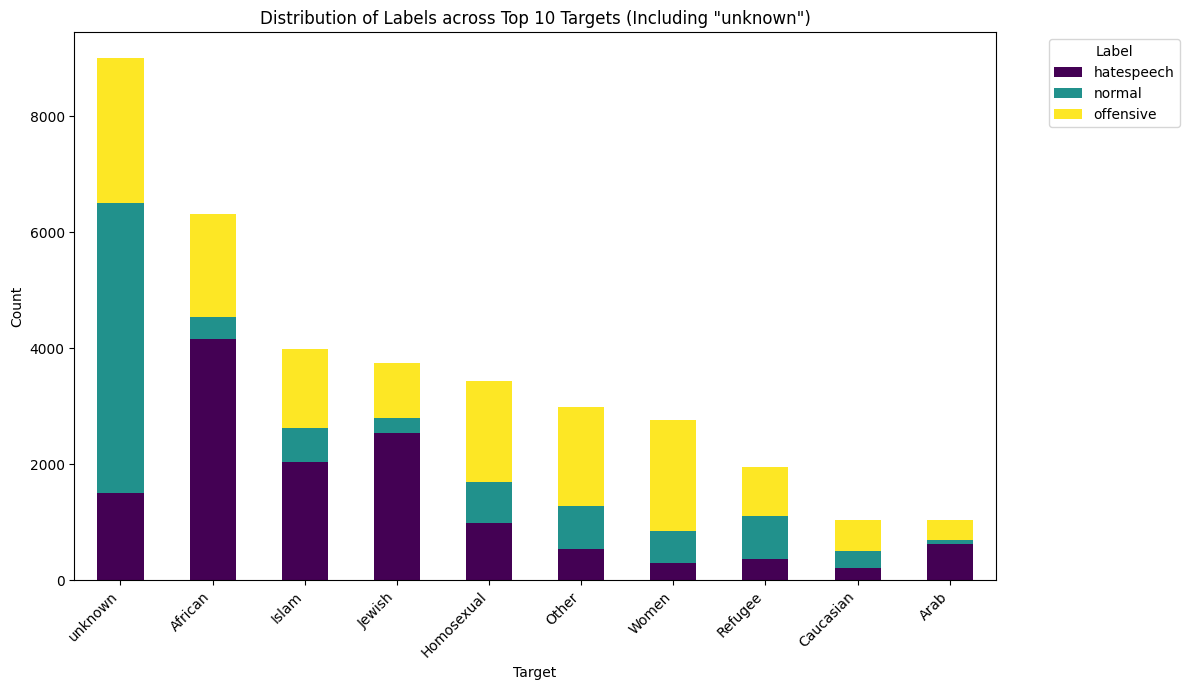

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N most frequent targets, including 'unknown'
N = 10
top_targets_with_unknown = contingency_table.sum().nlargest(N).index

# Filter the contingency table for these top targets
contingency_table_top_targets_with_unknown = contingency_table[top_targets_with_unknown]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))
contingency_table_top_targets_with_unknown.T.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

ax.set_title(f'Distribution of Labels across Top {N} Targets (Including "unknown")')
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


clean the text in `post_tokens` to prepare it for the modelisation

In [16]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import os

In [17]:
try:
    stopwords.words('english')
except LookupError:
    print("NLTK stopwords not found. Downloading...")
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("NLTK punkt tokenizer not found. Downloading...")
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("NLTK punkt_tab tokenizer not found. Downloading...")
    nltk.download('punkt_tab')

In [18]:
def preprocess_text(text):
    """Cleans and tokenizes text."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(filtered_tokens)

In [19]:
def remove_numbers(text):
    """Removes digits from text."""
    if not isinstance(text, str):
        return ""
    return ''.join([c for c in text if not c.isdigit()])

In [20]:
df_clean['cleaned_text'] = df_clean['post_tokens'].apply(preprocess_text)
df_clean['cleaned_text'] = df_clean['cleaned_text'].apply(remove_numbers)

df_clean[['post_tokens', 'cleaned_text']].head()

,post_tokens,cleaned_text
0,<user> maybe should have course for monkeys an...,user maybe course monkeys towelheads sensitivi...
1,good more like this the more rapefugees welcom...,good like rapefugees welcome faggots get gutte...
2,christianity role is historical protector of t...,christianity role historical protector jews af...
3,thank ya baby gays ✌ ️ 😉,thank ya baby gays
4,weddings are gay as fuck,weddings gay fuck


In [ ]:
df_clean.to_csv('hateXplain_cleaned.csv', index=False)